## Machine Learning:  Logistic Regression

Extramarital Affairs Dataset
The dataset is affairs dataset and comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

Description of Variables
The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
Problem Statement
We treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and try to predict the classification for each woman.

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
%matplotlib inline

C:\Users\Arron con Pollo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Collecting Data

In [2]:
# load dataset
data = sm.datasets.fair.load_pandas().data

In [3]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
# add "affair" column: 1 represents having affairs, 0 represents not
data['affair'] = (data.affairs > 0).astype(int)

In [5]:
data.head() 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
len(data.index)

6366

## Analyzing Data

In [7]:
data.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Here we see that on average, women who have affairs rate their marriages lower.

In [8]:
data.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

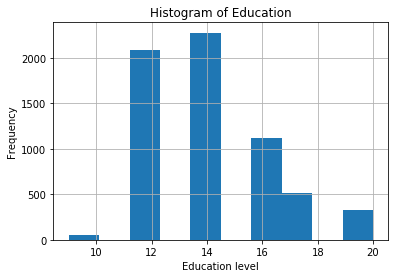

In [9]:
#histogram of education
data.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

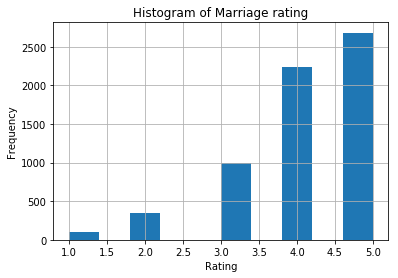

In [10]:
#histogram of marriage rating
data.rate_marriage.hist()
plt.title('Histogram of Marriage rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

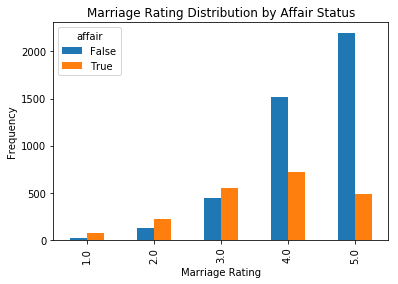

In [11]:
#Lets compare the rating of those who had an affair vs those who did not
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

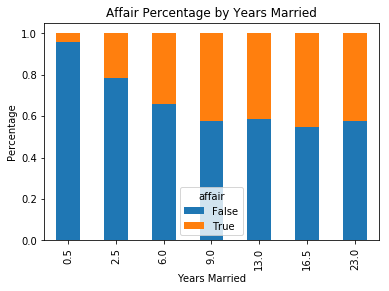

In [12]:
#barplot to look at the percentage of women having affairs by number of years of marriage.
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [13]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

## Data Wrangling
Preparing data for logistic regression

In [14]:
from patsy import dmatrices

In [15]:
#adding an intercept column and dummy variables for occupation_husb since they are categorical variables
y, X =dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                religious + educ + C(occupation) + C(occupation_husb)',
                data, return_type="dataframe")
print (X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [16]:
# rename column names for the dummy variables for better looks:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [17]:
X.head(10)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
Intercept        6366 non-null float64
occ_2            6366 non-null float64
occ_3            6366 non-null float64
occ_4            6366 non-null float64
occ_5            6366 non-null float64
occ_6            6366 non-null float64
occ_husb_2       6366 non-null float64
occ_husb_3       6366 non-null float64
occ_husb_4       6366 non-null float64
occ_husb_5       6366 non-null float64
occ_husb_6       6366 non-null float64
rate_marriage    6366 non-null float64
age              6366 non-null float64
yrs_married      6366 non-null float64
children         6366 non-null float64
religious        6366 non-null float64
educ             6366 non-null float64
dtypes: float64(17)
memory usage: 895.2 KB


In [19]:
#flatten y into a 1-D array so that scikit-learn will properly understand it as the response variable.
y = np.ravel(y)

In [20]:
print(y)

[1. 1. 1. ... 0. 0. 0.]


## Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()
model = model.fit(X, y)

In [23]:
# check the accuracy on the training set
model.score(X, y)

0.7258875274897895

In [24]:
# what percentage had affairs?
y.mean()

0.3224945020420987

In [25]:
# examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,occ_2,[0.18806639024440983]
2,occ_3,[0.4989478668156914]
3,occ_4,[0.25066856498524825]
4,occ_5,[0.8390080648117001]
5,occ_6,[0.8339084337443315]
6,occ_husb_2,[0.1906359445867889]
7,occ_husb_3,[0.2978327129263421]
8,occ_husb_4,[0.1614088540760616]
9,occ_husb_5,[0.18777091388972483]


## Model Evaluation using a validations set
need to split into training and testing data set

In [26]:
# Train vs test
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [28]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
#predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1. 1. 0. ... 0. 0. 0.]


In [30]:
#generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.439268   0.560732  ]
 [0.46400179 0.53599821]
 [0.61778296 0.38221704]
 ...
 [0.77297269 0.22702731]
 [0.74433665 0.25566335]
 [0.86400994 0.13599006]]


In [31]:
from sklearn import metrics

In [32]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.7306044740599714
0.7448068882725505


In [34]:
# we can also see the confusion matrix and a classification report with other metrics.# we can 
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[1285  136]
 [ 430  250]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1421
        1.0       0.65      0.37      0.47       680

avg / total       0.72      0.73      0.71      2101



## Model Evaluation using Cross-Validation

In [36]:
from sklearn.cross_validation import cross_val_score

C:\Users\Arron con Pollo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
#10 fold cross validation to see if the accuracy holds up. 
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


In [39]:
#Accuracy
print(scores.mean())

0.7241630685514876
